In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !kaggle datasets download 'ashishjangra27/face-mask-12k-images-dataset'b

In [10]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [34]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [83]:
#Load train and test set
train_dir = 'Face Mask Dataset/Train'
test_dir = 'Face Mask Dataset/Test'
val_dir = 'Face Mask Dataset/Validation'

In [84]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=64)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=64)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_dir,target_size=(128,128),class_mode='categorical',batch_size=64)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [23]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

In [29]:
cnn_model = Sequential()

# first convolutional layer
cnn_model.add(Conv2D(filters=256, kernel_size=3, input_shape=[128, 128, 3]))
cnn_model.add(MaxPool2D(pool_size=2, strides=1))
cnn_model.add(Dropout(0.3))

# second convolutional layer
cnn_model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
cnn_model.add(MaxPool2D(pool_size=2, strides=2))
cnn_model.add(Dropout(0.3))

# Third convolutional layer
cnn_model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
cnn_model.add(MaxPool2D(pool_size=2, strides=2))
cnn_model.add(Dropout(0.3))

# Flattening
cnn_model.add(Flatten())

# Step 4 - Full Connection
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.3))

# Step 5 - Output Layer
cnn_model.add(Dense(units=2, activation='sigmoid'))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 256)     7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 125, 125, 256)     0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 125, 125, 256)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 123, 123, 128)     295040    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 59, 59, 64)       

In [27]:
train_generator.n

10000

In [30]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn_model.fit(train_generator,
                        steps_per_epoch = 10000//64,
                        epochs = 5,
                        validation_data = val_generator,
                        validation_steps = 800//64,
                        verbose=1)

Epoch 1/5
156/156 [==============================] - 71s 445ms/step - loss: 0.5033 - accuracy: 0.8407 - val_loss: 0.1097 - val_accuracy: 0.9792
Epoch 2/5
156/156 [==============================] - 70s 447ms/step - loss: 0.1184 - accuracy: 0.9602 - val_loss: 0.0858 - val_accuracy: 0.9753
Epoch 3/5
156/156 [==============================] - 69s 443ms/step - loss: 0.0895 - accuracy: 0.9671 - val_loss: 0.0728 - val_accuracy: 0.9779
Epoch 4/5
156/156 [==============================] - 70s 444ms/step - loss: 0.0733 - accuracy: 0.9759 - val_loss: 0.0487 - val_accuracy: 0.9883
Epoch 5/5
156/156 [==============================] - 70s 448ms/step - loss: 0.0550 - accuracy: 0.9803 - val_loss: 0.0373 - val_accuracy: 0.9870


In [184]:
!apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [48]:
matplotlib.rcParams['figure.figsize'] = (9,6)

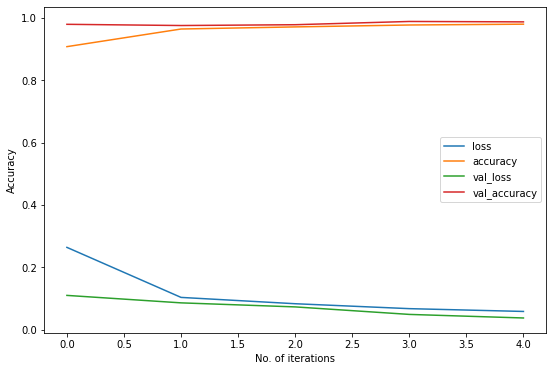

In [49]:
pd.DataFrame(history.history).plot()
plt.xlabel("No. of iterations")
plt.ylabel("Accuracy");

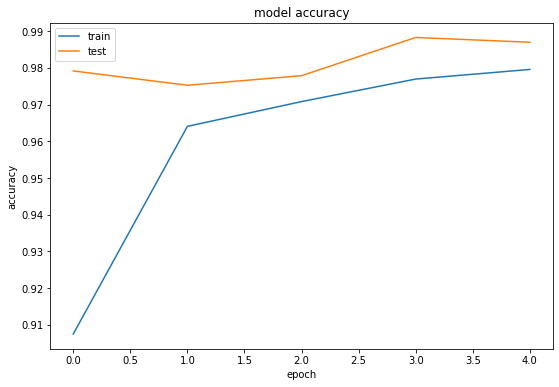

In [50]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

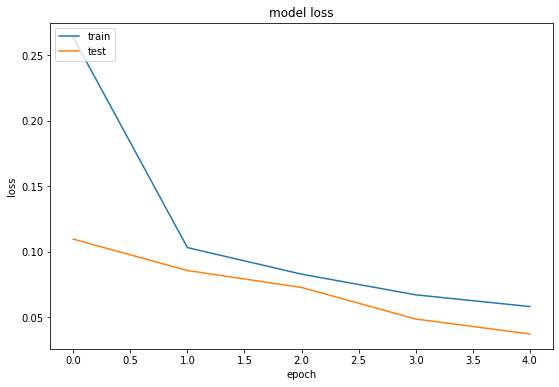

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
X_test=np.concatenate([test_generator.next()[0] for i in range(test_generator.__len__())])
y_test=np.concatenate([test_generator.next()[1] for i in range(test_generator.__len__())])
print(X_test.shape)
print(y_test.shape)

(992, 128, 128, 3)
(992, 2)


In [108]:
from sklearn.metrics import confusion_matrix
y_pred = cnn_model.predict_generator(test_generator,992//64 +1)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


array([[461,  22],
       [  4, 505]])

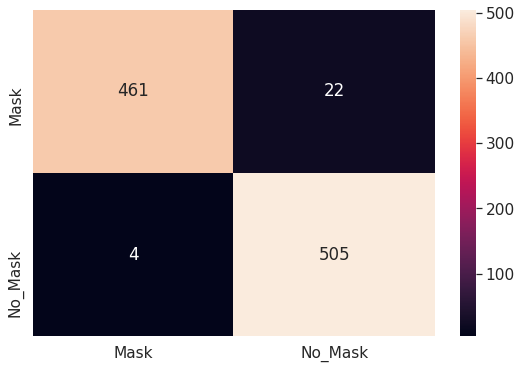

In [160]:
df_cm = pd.DataFrame(matrix, index = [i for i in "Mask No_Mask".split()],
                  columns = [i for i in "Mask No_Mask".split()])
sns.heatmap(df_cm,annot=True,fmt="d");

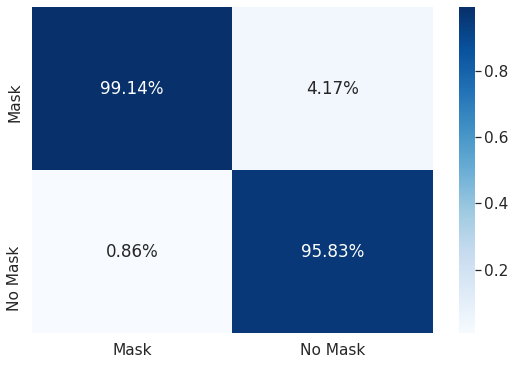

In [173]:
sns.heatmap(matrix/sum(matrix),annot=True,fmt='.2%',cmap='Blues',xticklabels=["Mask","No Mask"], yticklabels=["Mask","No Mask"]);

In [171]:
np.array(df_cm)

array([[461,  22],
       [  4, 505]])